In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('Facebook_Marketplace_data.csv')
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df = df.rename(columns={'status_type': 'post_type'})

In [4]:
df.head()

,status_id,post_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.drop(columns=['Column1' , 'Column2' , 'Column3' , 'Column4'],inplace=True)

In [6]:
df.head()

,status_id,post_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [7]:
df.isnull().sum()


status_id           0
post_type           0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

**1.	How does the time of upload (`status_published`)  affects the `num_reaction`?**

In [8]:
df['status_published'] = pd.to_datetime(df['status_published'])

In [9]:
df['hour'] = df['status_published'].dt.hour


In [10]:
x = df[['hour', 'num_reactions']]
x.head()

,hour,num_reactions
0,6,529
1,22,150
2,6,227
3,2,111
4,3,213


In [11]:
y = df.groupby('hour')['num_reactions'].mean()

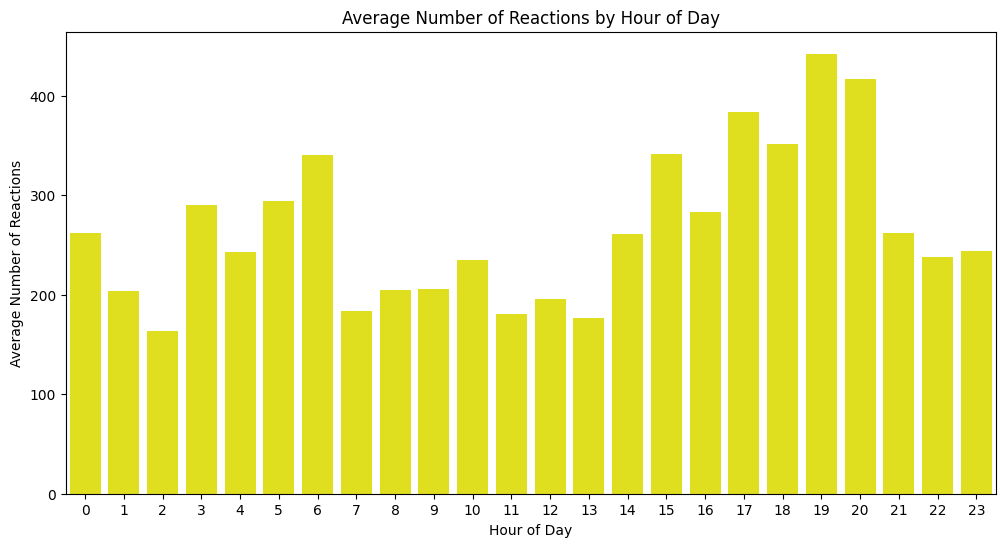

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(y, color='yellow')
plt.title('Average Number of Reactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Reactions')
plt.show()

**2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?**

In [13]:
df1 = df[['num_reactions' , 'num_comments' , 'num_shares' , 'num_likes' , 'num_loves' , 'num_wows' , 'num_hahas' , 'num_sads' , 'num_angrys']]

In [14]:
df1.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


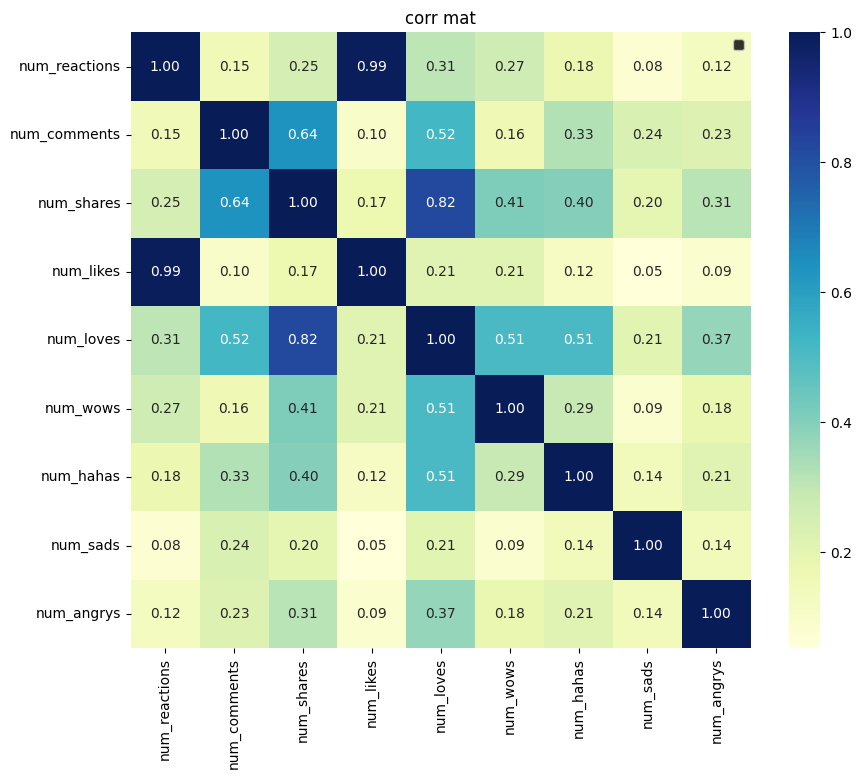

In [15]:
numeric_df=df1.select_dtypes(include=['int64','float64'])
corr_mat=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,annot=True,cmap='YlGnBu',fmt=".2f")
plt.style.use("dark_background")


color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)
plt.legend()
plt.title("corr mat")
plt.show()

**

**1.	What is the count of different types of posts in the dataset?**

In [16]:
df.head()

,status_id,post_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,6
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,22
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,6
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,3


In [37]:
print("Count of different type of posts")
df['post_type'].value_counts()

Count of different type of posts


post_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

**6.	What is the average value of num_reaction, num_comments, num_shares for each post type?**

In [18]:
df2 = df[['post_type' , 'num_reactions' , 'num_comments' , 'num_shares' ]]

In [19]:
df2.head()

,post_type,num_reactions,num_comments,num_shares
0,video,529,512,262
1,photo,150,0,0
2,video,227,236,57
3,photo,111,0,0
4,photo,213,0,0


In [20]:
avg_values = df.groupby('post_type')[['num_reactions' , 'num_comments' , 'num_shares' ]].mean()

In [40]:
avg_values.round()

,num_reactions,num_comments,num_shares
post_type,,,
link,370.0,6.0,4.0
photo,181.0,16.0,3.0
status,439.0,36.0,3.0
video,283.0,642.0,116.0


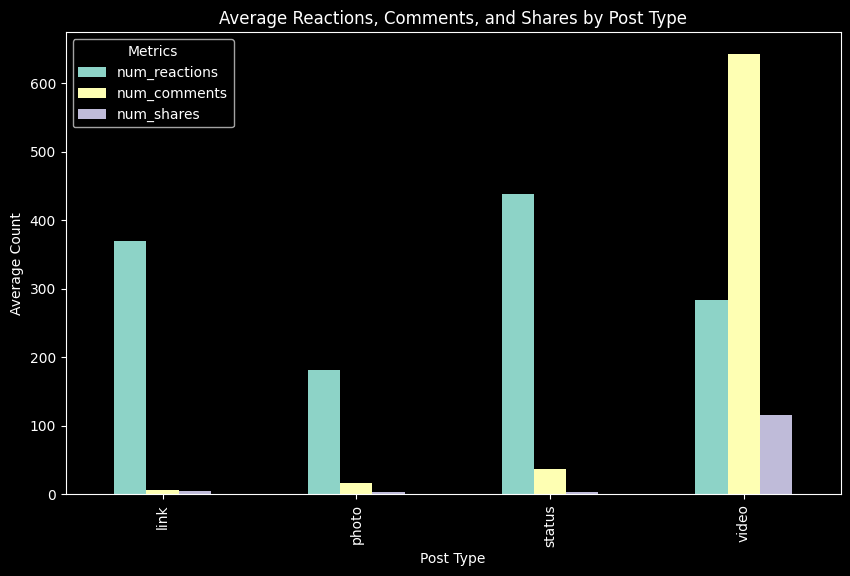

In [22]:
avg_values.plot(kind='bar', figsize=(10, 6) )

# Adding title and labels
plt.title('Average Reactions, Comments, and Shares by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Count')
plt.legend(title='Metrics')



# Display the plot
plt.show()

**3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.**

In [23]:
#we should do one hot encoding for post_type column

In [24]:
df.head()

,status_id,post_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,6
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,22
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,6
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,3


In [25]:
x = df[[   'post_type', 'num_reactions' , 'num_comments' , 'num_shares' , 'num_likes' , 'num_loves' , 'num_wows' , 'num_hahas' , 'num_sads' , 'num_angrys']].values

In [26]:
print(x)

[['video' 529 512 ... 1 1 0]
 ['photo' 150 0 ... 0 0 0]
 ['video' 227 236 ... 1 0 0]
 ...
 ['photo' 2 0 ... 0 0 0]
 ['photo' 351 12 ... 0 0 0]
 ['photo' 17 0 ... 0 0 0]]


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder = 'passthrough')
x = np.array(ct.fit_transform(x))
print(x)


[[0.0 0.0 0.0 ... 1 1 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 0.0 ... 1 0 0]
 ...
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]]


In [28]:
#Elbow method

In [29]:
wcss = []

In [30]:
for i in range(1,11):
  kmeans = KMeans(n_clusters=i , init='k-means++' , random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [31]:
wcss

[8645689584.70013,
 4986395385.977707,
 2735261382.8729024,
 2000978404.0138931,
 1469927237.528268,
 1186923961.4372025,
 923404510.7268219,
 749945119.2442813,
 621422823.9450424,
 523196270.32718766]

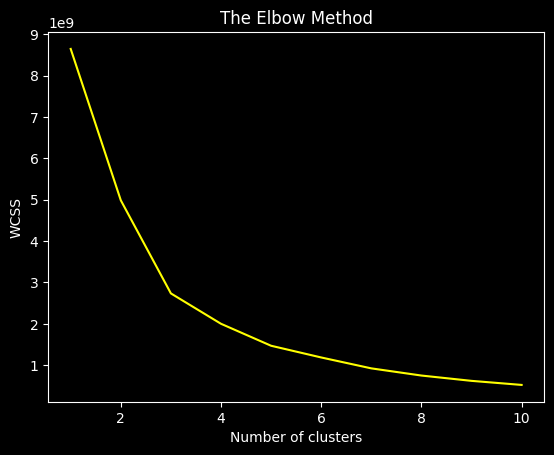

In [32]:
plt.plot(range(1,11) , wcss , c='yellow')
plt.style.use("dark_background")


color_palette = sns.diverging_palette(250, 0,center = 'dark', as_cmap = True)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
#no of cluster = 3

In [34]:
kmeans = KMeans(n_clusters=3 , init='k-means++' , random_state=42)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


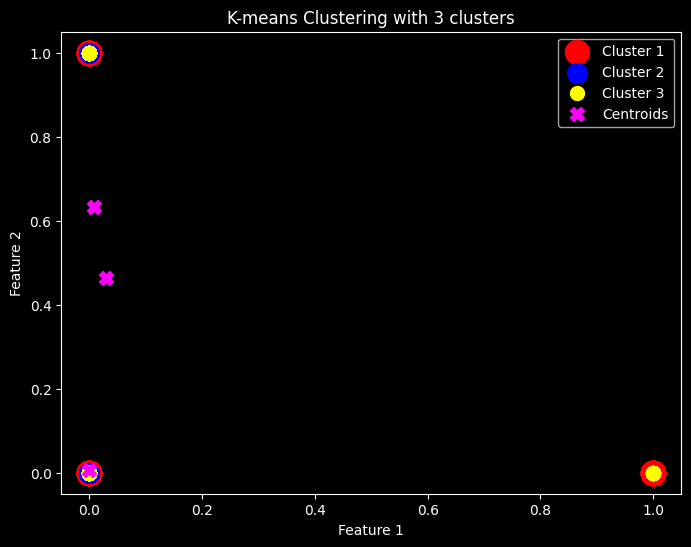

In [35]:




kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

# Fit the K-means model and predict clusters
y_kmeans = kmeans.fit_predict(x)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=300, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=200, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='yellow', label='Cluster 3')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='magenta', label='Centroids', marker='X')

# Add labels and legend
plt.title('K-means Clustering with 3 clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

